In [ ]:
from google.colab import drive
drive.flush_and_unmount()

import shutil
import os

# Path to the content directory
content_dir = '/content/'

# List the contents inside the content directory
for filename in os.listdir(content_dir):
    file_path = os.path.join(content_dir, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove files or symlinks
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Remove directories
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')

print(f"All contents inside '{content_dir}' have been deleted.")

Drive not mounted, so nothing to flush and unmount.
All contents inside '/content/' have been deleted.


In [ ]:
!nvidia-smi

Tue Apr  1 03:33:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


In [ ]:
pip install -U ultralytics

  Using cached ultralytics-8.3.99-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.99-py3-none-any.whl (976 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.8/235.7 GB disk)


In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define HOME directory
HOME = '/content'

# Create a dedicated directory for datasets
!mkdir -p {HOME}/datasets

# Change working directory to datasets folder
%cd {HOME}/datasets

# Path to your dataset zip file in Google Drive
zip_path = "/content/drive/My Drive/Pistachios/New-Pistachios.v3i.yolov8.zip"

# Unzipping the dataset to the datasets directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(f'{HOME}/datasets')

# List the contents of the datasets directory to verify extraction
!ls {HOME}/datasets

# Now directly using the paths to train, valid, and test inside datasets
!ls {HOME}/datasets/train || echo "Folder does not exist. Listing contents of /content/datasets to check the structure:"


Mounted at /content/drive
/content/datasets
data.yaml  README.roboflow.txt	test  train  valid
images	labels


In [ ]:
import os

# Define HOME directory (assumed to be '/content')
HOME = '/content'

splits = ['train', 'valid', 'test']

# Overall totals
overall_bg_annotations = 0
overall_pistachio_annotations = 0
overall_total_annotations = 0
overall_total_images = 0

for split in splits:
    # Directories for each split
    annotations_dir = os.path.join(HOME, 'datasets', split, 'labels')
    images_dir = os.path.join(HOME, 'datasets', split, 'images')

    # Counters for this split
    bg_count = 0          # Count for background (class_id=0)
    pistachio_count = 0   # Count for pistachio (class_id=1)
    total_annotations = 0
    image_count = 0

    # Count annotations in each label file
    if os.path.exists(annotations_dir):
        for file_name in os.listdir(annotations_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(annotations_dir, file_name)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        line = line.strip()
                        if not line:
                            continue
                        parts = line.split()
                        class_id = int(parts[0])
                        total_annotations += 1
                        if class_id == 0:
                            bg_count += 1
                        elif class_id == 1:
                            pistachio_count += 1

    # Count images in the images directory
    if os.path.exists(images_dir):
        for file_name in os.listdir(images_dir):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                image_count += 1

    # Update overall totals
    overall_bg_annotations += bg_count
    overall_pistachio_annotations += pistachio_count
    overall_total_annotations += total_annotations
    overall_total_images += image_count

    # Print split summary
    print(f"{split.upper()} set:")
    print(f"  Images: {image_count}")
    print(f"  Total Annotations: {total_annotations}")
    print(f"    - Background (class_id=0): {bg_count}")
    print(f"    - Pistachios (class_id=1): {pistachio_count}")
    print("")

# Print overall summary
print("==== OVERALL TOTALS ====")
print(f"Total Images: {overall_total_images}")
print(f"Total Annotations: {overall_total_annotations}")
print(f"  - Background (class_id=0): {overall_bg_annotations}")
print(f"  - Pistachios (class_id=1): {overall_pistachio_annotations}")

TRAIN set:
  Images: 500
  Total Annotations: 18765
    - Background (class_id=0): 500
    - Pistachios (class_id=1): 18265

VALID set:
  Images: 30
  Total Annotations: 1220
    - Background (class_id=0): 30
    - Pistachios (class_id=1): 1190

TEST set:
  Images: 15
  Total Annotations: 571
    - Background (class_id=0): 15
    - Pistachios (class_id=1): 556

==== OVERALL TOTALS ====
Total Images: 545
Total Annotations: 20556
  - Background (class_id=0): 545
  - Pistachios (class_id=1): 20011


In [ ]:
import os
import shutil
import random
import uuid
from PIL import Image

# ===================== CONFIGURATION ======================
HOME = '/content'

# Paths to the original dataset splits (each with "images/" and "labels/" subfolders)
original_dataset_dir = os.path.join(HOME, 'datasets')
splits = ['train', 'valid', 'test']

# Directory to unify all images and labels before processing
unified_dir = os.path.join(HOME, 'unified_dataset')
unified_img_dir = os.path.join(unified_dir, 'images')
unified_lbl_dir = os.path.join(unified_dir, 'labels')
os.makedirs(unified_img_dir, exist_ok=True)
os.makedirs(unified_lbl_dir, exist_ok=True)

# YOLO class IDs in your dataset (before remapping)
BACKGROUND_CLASS_ID = 0     # original background
PISTACHIO_CLASS_ID  = 1     # original pistachio

# Final single-class YOLO config: after background removal, only one class (pistachios) remains.
train_ratio = 0.8
val_ratio   = 0.1
test_ratio  = 0.1

# Directories for final train/valid/test splits
base_dir = os.path.join(HOME, 'working_datasets')
train_img_dir = os.path.join(base_dir, 'train', 'images')
train_lbl_dir = os.path.join(base_dir, 'train', 'labels')
val_img_dir   = os.path.join(base_dir, 'valid', 'images')
val_lbl_dir   = os.path.join(base_dir, 'valid', 'labels')
test_img_dir  = os.path.join(base_dir, 'test', 'images')
test_lbl_dir  = os.path.join(base_dir, 'test', 'labels')

for d in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir, test_img_dir, test_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# ===================== STEP 1: UNIFY ALL IMAGES =====================
print("Combining all splits (train/valid/test) into one 'unified_dataset' folder...")

for split in splits:
    split_img_dir = os.path.join(original_dataset_dir, split, 'images')
    split_lbl_dir = os.path.join(original_dataset_dir, split, 'labels')
    if not os.path.isdir(split_img_dir):
        print(f"Warning: {split_img_dir} not found; skipping split '{split}'")
        continue

    for img_file in os.listdir(split_img_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        src_img_path = os.path.join(split_img_dir, img_file)
        # Use the full base name (do not strip off anything)
        base_name = os.path.splitext(img_file)[0]
        lbl_file = base_name + '.txt'
        src_lbl_path = os.path.join(split_lbl_dir, lbl_file) if os.path.isfile(os.path.join(split_lbl_dir, lbl_file)) else None

        # Copy image into unified folder
        dst_img_path = os.path.join(unified_img_dir, img_file)
        shutil.copy2(src_img_path, dst_img_path)

        # Copy corresponding label file if it exists
        if src_lbl_path and os.path.isfile(src_lbl_path):
            dst_lbl_path = os.path.join(unified_lbl_dir, lbl_file)
            shutil.copy2(src_lbl_path, dst_lbl_path)

print("All splits have been merged into:", unified_dir)
print("")

# ===================== STEP 2: BACKGROUND REMOVAL =====================
def read_yolo_annotation(file_path):
    """Reads YOLO-format annotations (bounding boxes or polygons)."""
    annotations = []
    if not os.path.exists(file_path):
        return annotations
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            class_id = int(parts[0])
            coords = list(map(float, parts[1:]))
            if len(coords) == 4:
                x_c, y_c, w, h = coords
                annotations.append((class_id, x_c, y_c, w, h))
            else:
                if len(coords) < 6 or len(coords) % 2 != 0:
                    print(f"Skipping malformed polygon line in {file_path}: '{line}'")
                    continue
                xs = coords[0::2]
                ys = coords[1::2]
                x_min, x_max = min(xs), max(xs)
                y_min, y_max = min(ys), max(ys)
                x_c = (x_min + x_max) / 2.0
                y_c = (y_min + y_max) / 2.0
                w   = x_max - x_min
                h   = y_max - y_min
                annotations.append((class_id, x_c, y_c, w, h))
    return annotations

def save_yolo_annotation(file_path, annotations):
    """Writes YOLO-format annotations to a file."""
    with open(file_path, 'w') as f:
        for ann in annotations:
            class_id, x_c, y_c, w, h = ann
            f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")

all_images = [img for img in os.listdir(unified_img_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

num_bg_crops_created = 0
num_images_with_pistachio = 0
num_negative_images = 0

print("Removing 'background' bounding boxes (class_id=0) and cropping them into new negative images...")

for img_name in all_images:
    label_path = os.path.join(unified_lbl_dir, os.path.splitext(img_name)[0] + '.txt')
    if not os.path.exists(label_path):
        num_negative_images += 1
        continue
    annotations = read_yolo_annotation(label_path)
    if not annotations:
        num_negative_images += 1
        continue
    image_path = os.path.join(unified_img_dir, img_name)
    img = Image.open(image_path).convert('RGB')
    img_w, img_h = img.size
    updated_annotations = []
    for i, ann in enumerate(annotations):
        class_id, x_c, y_c, w, h = ann
        if class_id == BACKGROUND_CLASS_ID:
            x_center = x_c * img_w
            y_center = y_c * img_h
            bbox_w   = w * img_w
            bbox_h   = h * img_h
            x_min = int(x_center - bbox_w / 2)
            x_max = int(x_center + bbox_w / 2)
            y_min = int(y_center - bbox_h / 2)
            y_max = int(y_center + bbox_h / 2)
            cropped = img.crop((x_min, y_min, x_max, y_max))
            base_name = os.path.splitext(img_name)[0]
            unique_id = uuid.uuid4().hex
            crop_img_name = f"{base_name}_bg_{i}_{unique_id}.jpg"
            crop_img_path = os.path.join(unified_img_dir, crop_img_name)
            cropped.save(crop_img_path)
            crop_label_path = os.path.join(unified_lbl_dir, os.path.splitext(crop_img_name)[0] + '.txt')
            open(crop_label_path, 'w').close()
            num_bg_crops_created += 1
        else:
            new_class_id = 0
            updated_annotations.append((new_class_id, x_c, y_c, w, h))
    save_yolo_annotation(label_path, updated_annotations)
    if len(updated_annotations) == 0:
        num_negative_images += 1
    else:
        num_images_with_pistachio += 1

print("Background removal completed!")
print(f"  Number of new negative crop images: {num_bg_crops_created}")
print(f"  Images with at least one pistachio: {num_images_with_pistachio}")
print(f"  Pure negative images (no bboxes):   {num_negative_images}")
print("")

# ===================== STEP 3: STRATIFIED SPLIT =====================
all_images = [img for img in os.listdir(unified_img_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

positive_images = []
negative_images = []

def has_annotations(label_path):
    if not os.path.isfile(label_path):
        return False
    ann = read_yolo_annotation(label_path)
    return (len(ann) > 0)

for img_name in all_images:
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(unified_lbl_dir, label_name)
    if has_annotations(label_path):
        positive_images.append(img_name)
    else:
        negative_images.append(img_name)

def split_counts(total):
    t = int(total * train_ratio)
    v = int(total * val_ratio)
    s = total - t - v
    return t, v, s

random.shuffle(positive_images)
random.shuffle(negative_images)

pos_train_count, pos_val_count, pos_test_count = split_counts(len(positive_images))
neg_train_count, neg_val_count, neg_test_count = split_counts(len(negative_images))

pos_train = positive_images[:pos_train_count]
pos_val   = positive_images[pos_train_count: pos_train_count + pos_val_count]
pos_test  = positive_images[pos_train_count + pos_val_count:]
neg_train = negative_images[:neg_train_count]
neg_val   = negative_images[neg_train_count: neg_train_count + neg_val_count]
neg_test  = negative_images[neg_train_count + neg_val_count:]

train_images = pos_train + neg_train
val_images   = pos_val + neg_val
test_images  = pos_test + neg_test

random.shuffle(train_images)
random.shuffle(val_images)
random.shuffle(test_images)

print("=== Stratified Split Results ===")
print(f"  Train: {len(train_images)} total = {len(pos_train)} positive + {len(neg_train)} negative")
print(f"  Valid: {len(val_images)} total  = {len(pos_val)} positive + {len(neg_val)} negative")
print(f"  Test:  {len(test_images)} total = {len(pos_test)} positive + {len(neg_test)} negative")
print("")

# ===================== STEP 4: MOVE FINAL SPLITS =====================
def move_files(image_list, img_dest_dir, lbl_dest_dir):
    for img_file in image_list:
        src_img_path = os.path.join(unified_img_dir, img_file)
        if not os.path.exists(src_img_path):
            print(f"Warning: {src_img_path} not found, skipping.")
            continue
        base_name = os.path.splitext(img_file)[0]  # Use the full base name (unchanged)
        lbl_file = base_name + '.txt'
        src_lbl_path = os.path.join(unified_lbl_dir, lbl_file)
        dst_img_path = os.path.join(img_dest_dir, img_file)
        dst_lbl_path = os.path.join(lbl_dest_dir, lbl_file)
        if os.path.exists(dst_img_path):
            os.remove(dst_img_path)
        shutil.move(src_img_path, dst_img_path)
        if os.path.exists(dst_lbl_path):
            os.remove(dst_lbl_path)
        if os.path.exists(src_lbl_path):
            shutil.move(src_lbl_path, dst_lbl_path)
        else:
            with open(dst_lbl_path, 'w') as f:
                f.write('')

print("Moving files to final train/valid/test directories...")
move_files(train_images, train_img_dir, train_lbl_dir)
move_files(val_images,   val_img_dir,   val_lbl_dir)
move_files(test_images,  test_img_dir,  test_lbl_dir)

print("Final dataset splits created in:", base_dir)
print("")
print("===== SUMMARY =====")
print(f"Train: {len(os.listdir(train_img_dir))} images -> {train_img_dir}")
print(f"Valid: {len(os.listdir(val_img_dir))} images -> {val_img_dir}")
print(f"Test:  {len(os.listdir(test_img_dir))} images -> {test_img_dir}")
print("")
print("Data config (data.yaml) example:")
print("nc: 1")
print("names: ['pistachios']")
print("train: ../train/images")
print("val:   ../valid/images")
print("test:  ../test/images")
print("")
print("Done! You now have a single-class dataset with no background bounding boxes,")
print("cropped negative samples, and an 80/10/10 stratified split stored in /content/working_datasets.")

Combining all splits (train/valid/test) into one 'unified_dataset' folder...
All splits have been merged into: /content/unified_dataset

Removing 'background' bounding boxes (class_id=0) and cropping them into new negative images...
Background removal completed!
  Number of new negative crop images: 545
  Images with at least one pistachio: 545
  Pure negative images (no bboxes):   0

=== Stratified Split Results ===
  Train: 872 total = 436 positive + 436 negative
  Valid: 108 total  = 54 positive + 54 negative
  Test:  110 total = 55 positive + 55 negative

Moving files to final train/valid/test directories...
Final dataset splits created in: /content/working_datasets

===== SUMMARY =====
Train: 872 images -> /content/working_datasets/train/images
Valid: 108 images -> /content/working_datasets/valid/images
Test:  110 images -> /content/working_datasets/test/images

Data config (data.yaml) example:
nc: 1
names: ['pistachios']
train: ../train/images
val:   ../valid/images
test:  ../tes

In [ ]:
import os

# Path to your datasets directory and desired data.yaml file
base_dir = '/content/working_datasets'
data_yaml_path = os.path.join(base_dir, 'data.yaml')

# Write out the updated data.yaml
with open(data_yaml_path, 'w') as f:
    f.write("train: ../train/images\n")
    f.write("val: ../valid/images\n")
    f.write("test: ../test/images\n\n")  # Make sure the 'test' split is defined!
    f.write("nc: 1\n")  # Single class
    f.write("names: ['Pistachios']\n\n")

    # (Optional) Roboflow metadata block; remove if not needed
    f.write("roboflow:\n")
    f.write("  workspace: pistachios-knen1\n")
    f.write("  project: new-pistachios-zoodo\n")
    f.write("  version: 2\n")
    f.write("  license: Private\n")
    f.write("  url: https://app.roboflow.com/pistachios-knen1/new-pistachios-zoodo/2\n")

print("data.yaml updated with single-class configuration.")


data.yaml updated with single-class configuration.


# Training

In [ ]:
from ultralytics import YOLO

# Go to home directory (optional, depending on your environment)
%cd /content

# Train YOLOv10x for 100 epochs using the new data.yaml
!yolo task=detect mode=train epochs=100 batch=16 imgsz=800 plots=True \
  model=/content/weights/yolov10x.pt \
  data=/content/working_datasets/data.yaml \
  conf=0.25 \
  iou=0.70

# OPTIONAL: If you prefer using Pythonic API:
# model = YOLO("/content/weights/yolov10x.pt")  # or "yolo11x.pt" if you want to try a different version
# results = model.train(
#     data="/content/working_datasets/data.yaml",
#     epochs=100,
#     imgsz=800,
#     batch=16,
#     plots=True,
#     device="cuda",
#     conf=0.25,
#     iou=0.70
# )

# Once training is complete, evaluate on the test subset
print("\n--- Evaluating on the Test Subset ---")
!yolo task=detect mode=val \
  data=/content/working_datasets/data.yaml \
  model=/content/runs/detect/train/weights/best.pt \
  split=test


/content
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10x.pt, data=/content/working_datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
# Load the trained YOLO model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
metrics = model.val(save_txt=True, split="test")
print(metrics.results_dict)

NameError: name 'YOLO' is not defined

/content


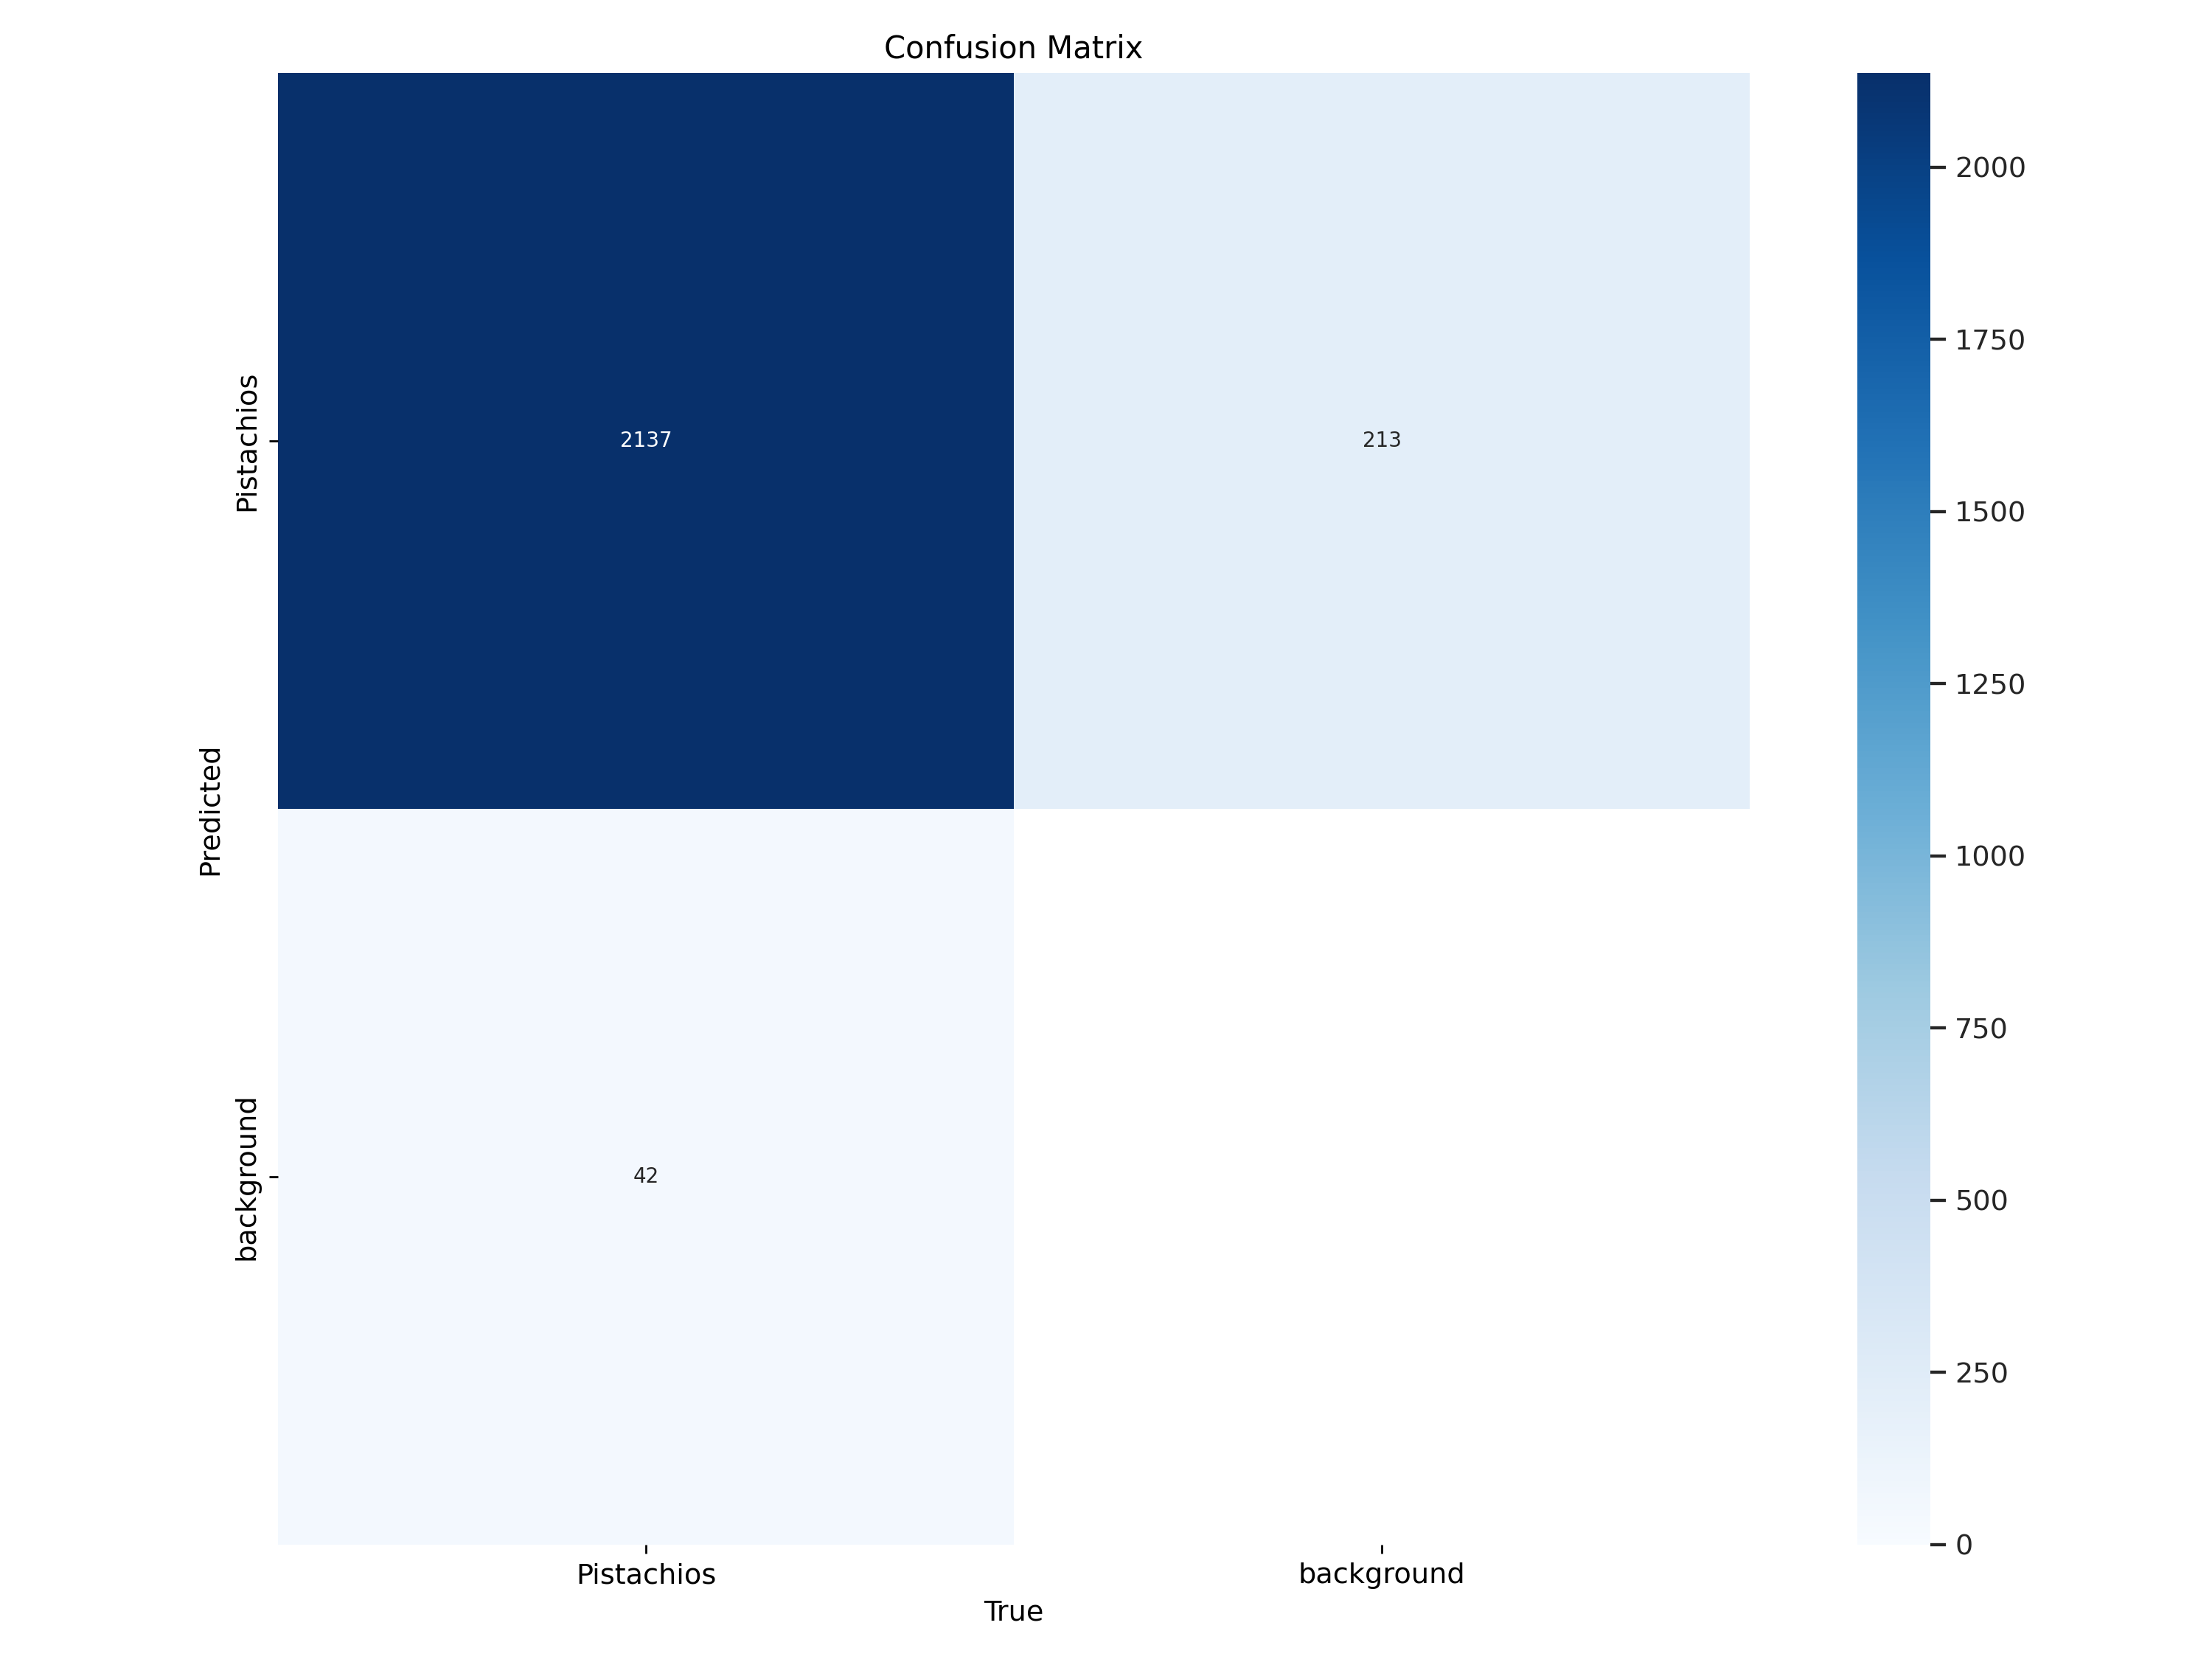

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


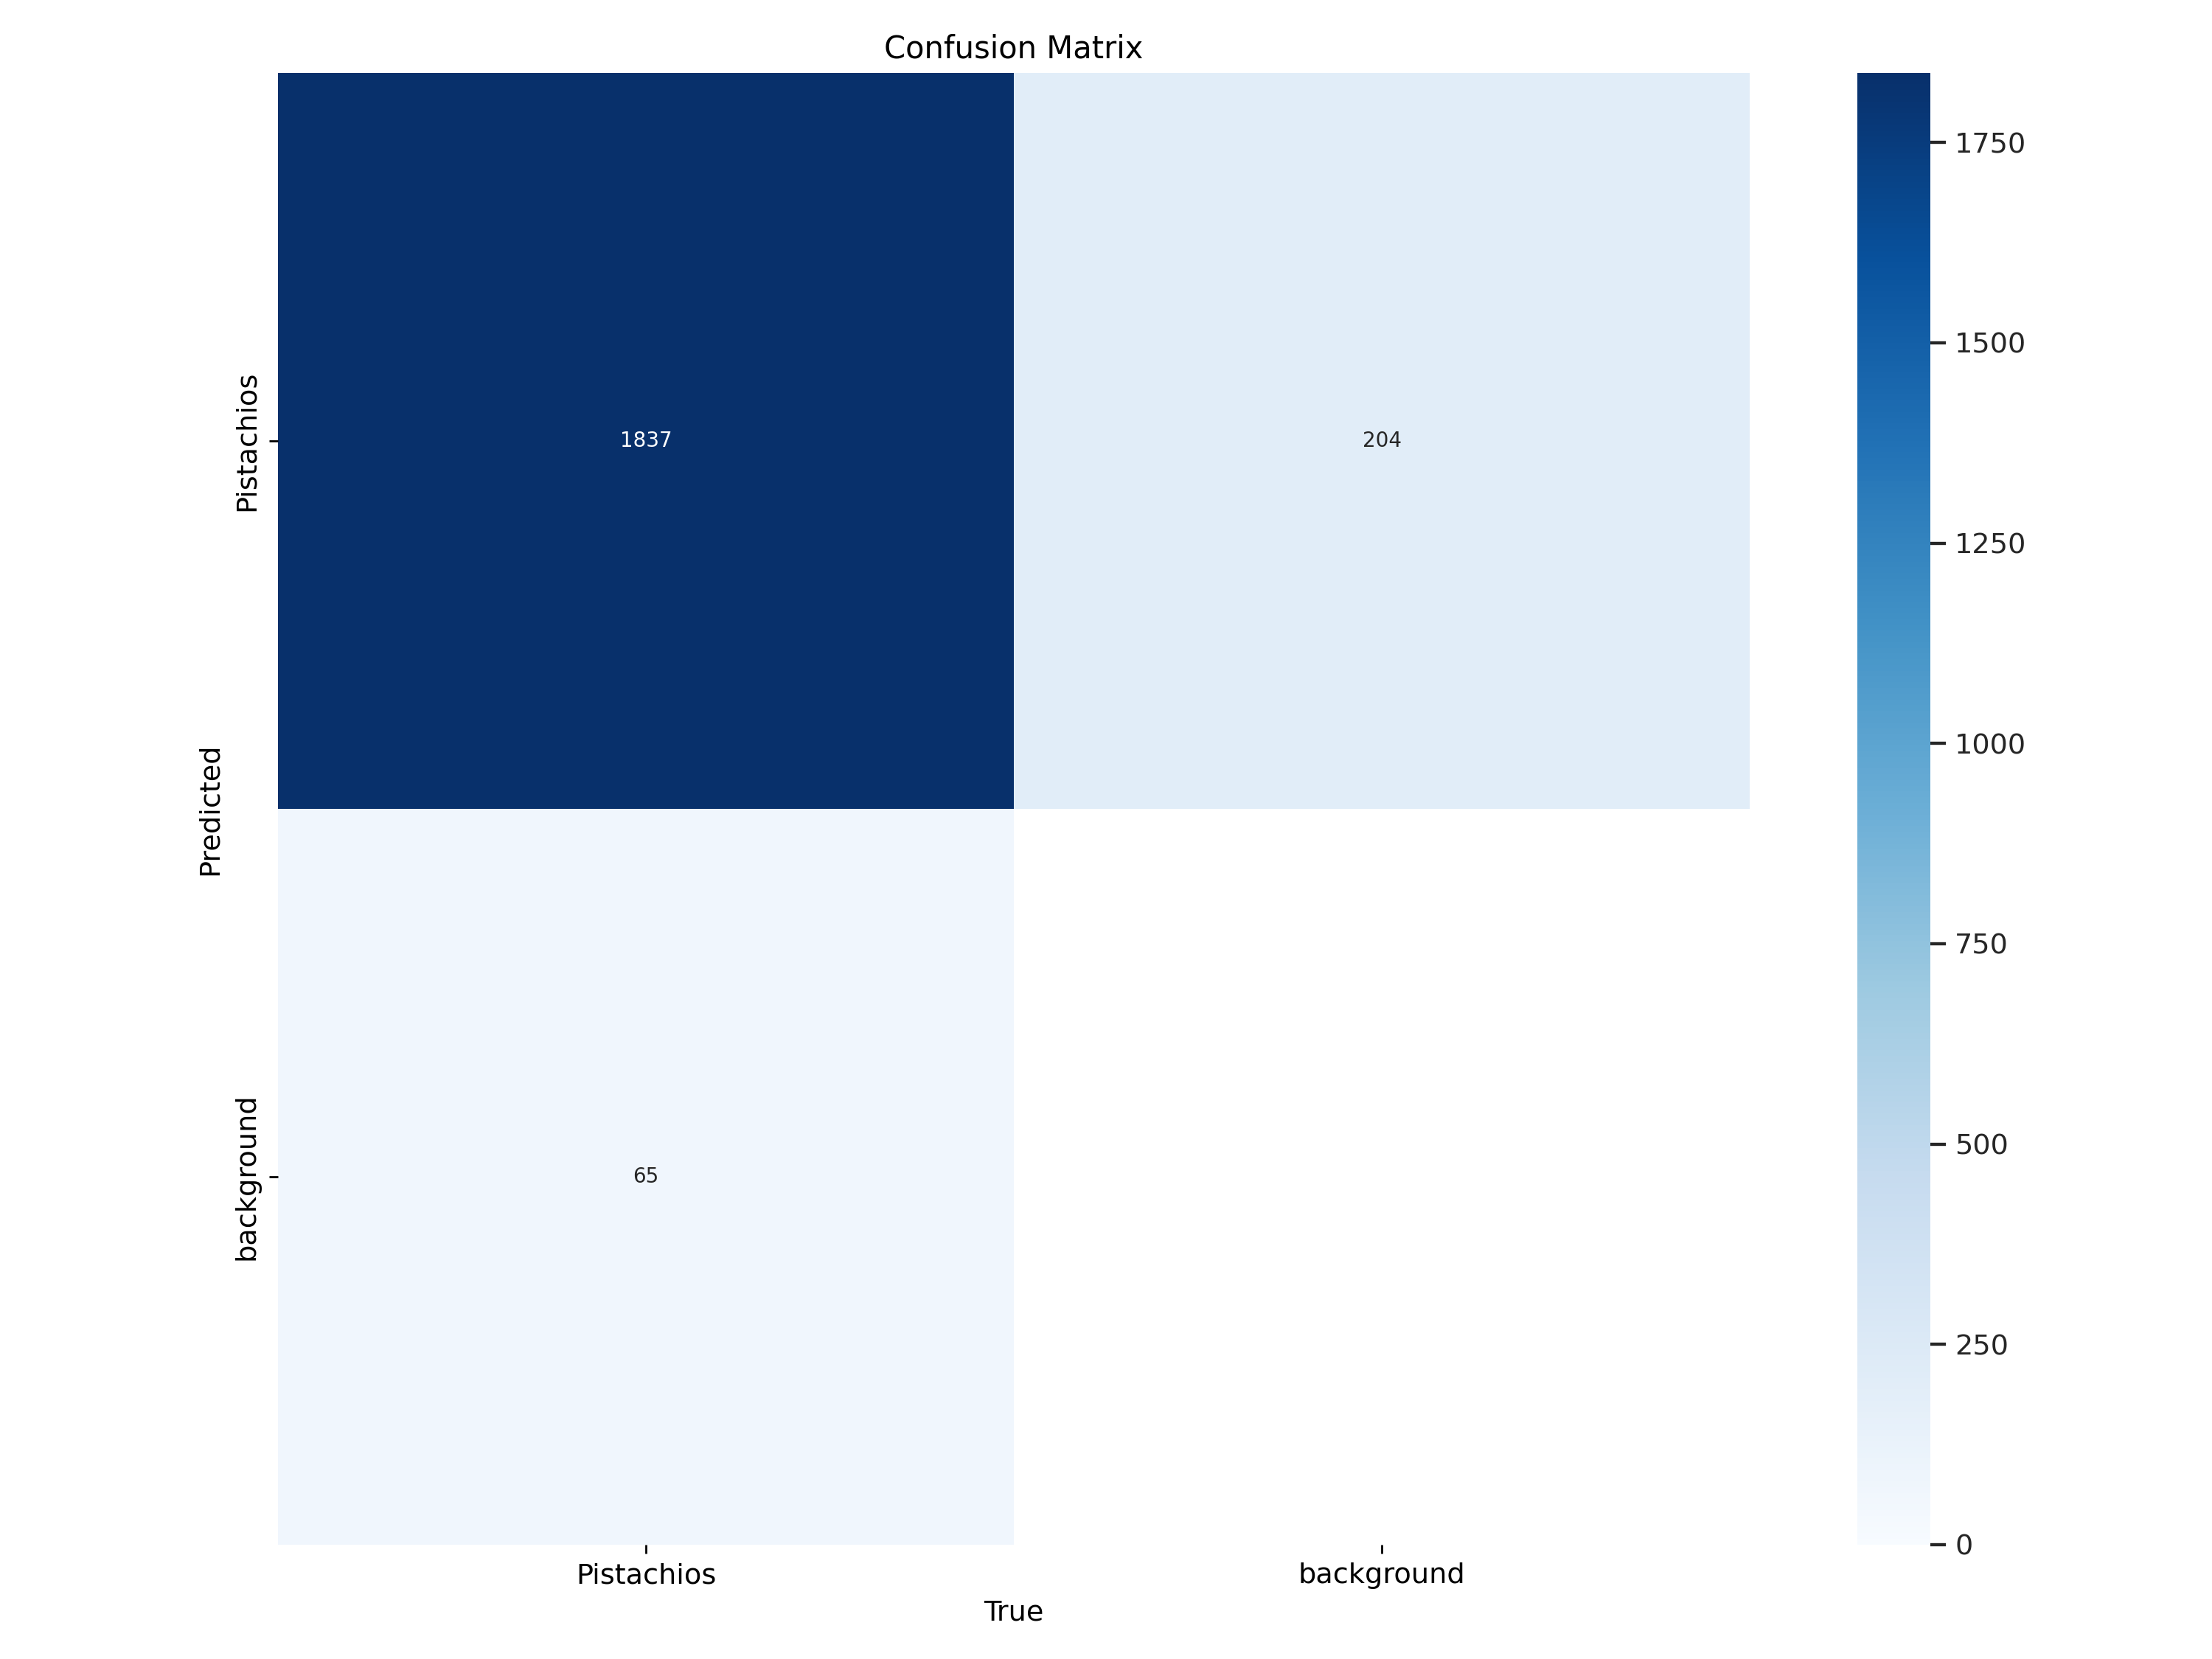

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv10x summary (fused): 215 layers, 31,586,006 parameters, 0 gradients, 169.8 GFLOPs


val: Scanning /content/working_datasets/test/labels.cache... 110 images, 55 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        110       2179       0.96      0.956      0.989      0.854
Speed: 3.9ms preprocess, 7.8ms inference, 0.0ms loss, 0.1ms postprocess per image
Saving runs/detect/val4/predictions.json...
Results saved to runs/detect/val4
Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


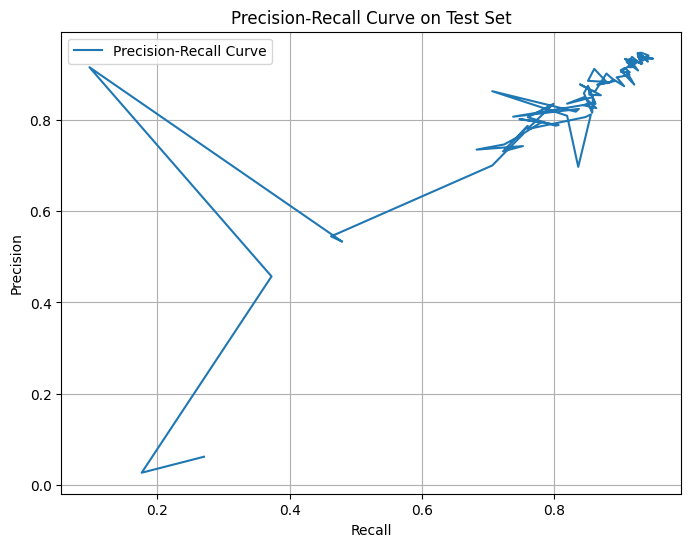

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 704x800 (no detections), 65.9ms
Speed: 4.1ms preprocess, 65.9ms inference, 0.5ms postprocess per image at shape (1, 3, 704, 800)


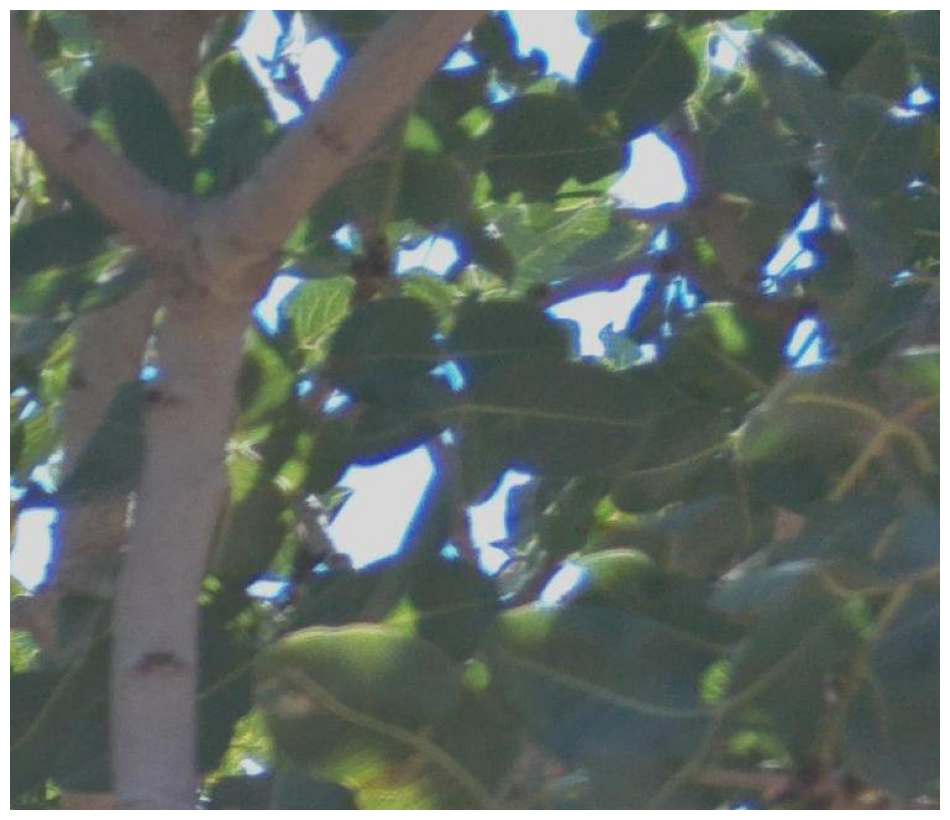

Final Test Precision: 0.93919
Final Test Recall: 0.94111
Final Test mAP@50: 0.97416
Final Test mAP@50-95: 0.84608


In [ ]:
from ultralytics import YOLO
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

HOME = '/content'

# Load the trained model (using best weights from training)
model_path = f'{HOME}/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Evaluate the model on the test subset (your data.yaml file contains the test split)
results = model.val(
    data='/content/working_datasets/data.yaml',  # This YAML must include "test: ../test/images"
    split='test',
    save_txt=True,
    save_conf=True,
    save_json=True
)

# The evaluation results (including confusion matrix, results images, etc.) will be saved in the /runs/detect/test/ directory.
# Display the confusion matrix image for the test set
Image(filename=os.path.join(HOME, 'runs/detect/val/confusion_matrix.png'), width=600)

# Display the results image for the test set
Image(filename=os.path.join(HOME, 'runs/detect/train/results.png'), width=600)

# Load the results CSV from the test evaluation
results_csv_path = os.path.join(HOME, 'runs/detect/train/results.csv')
try:
    results_df = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"Results CSV not found at: {results_csv_path}")
    raise

# Clean up the column names
results_df.columns = results_df.columns.str.strip()
print("Available columns:", results_df.columns)

# Extract precision and recall values using the cleaned column names
try:
    precision_values = results_df['metrics/precision(B)']
    recall_values = results_df['metrics/recall(B)']
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns are:", results_df.columns)
    raise

# Plot the Precision-Recall curve for the test set
plt.figure(figsize=(8,6))
plt.plot(recall_values, precision_values, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------
# Visualize detections on a random test image using Supervision
import cv2
import supervision as sv
import random

dataset_location = f'{HOME}/working_datasets'

# Load the test dataset using Supervision's dataset handler
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

# Set up annotators for bounding boxes and labels
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Select a random test image
random_key = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_key]

# Run detection on the random test image
results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

# Annotate the image with bounding boxes and labels
annotated_image = bounding_box_annotator.annotate(scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

# ------------------------------------------------------------------
# Optionally, print final metrics from the CSV file again for clarity
results_df = pd.read_csv(results_csv_path)
results_df.columns = results_df.columns.str.strip()
precision = results_df['metrics/precision(B)'].iloc[-1]
recall = results_df['metrics/recall(B)'].iloc[-1]
map_50 = results_df['metrics/mAP50(B)'].iloc[-1]
map_50_95 = results_df['metrics/mAP50-95(B)'].iloc[-1]

print(f"Final Test Precision: {precision}")
print(f"Final Test Recall: {recall}")
print(f"Final Test mAP@50: {map_50}")
print(f"Final Test mAP@50-95: {map_50_95}")


/content


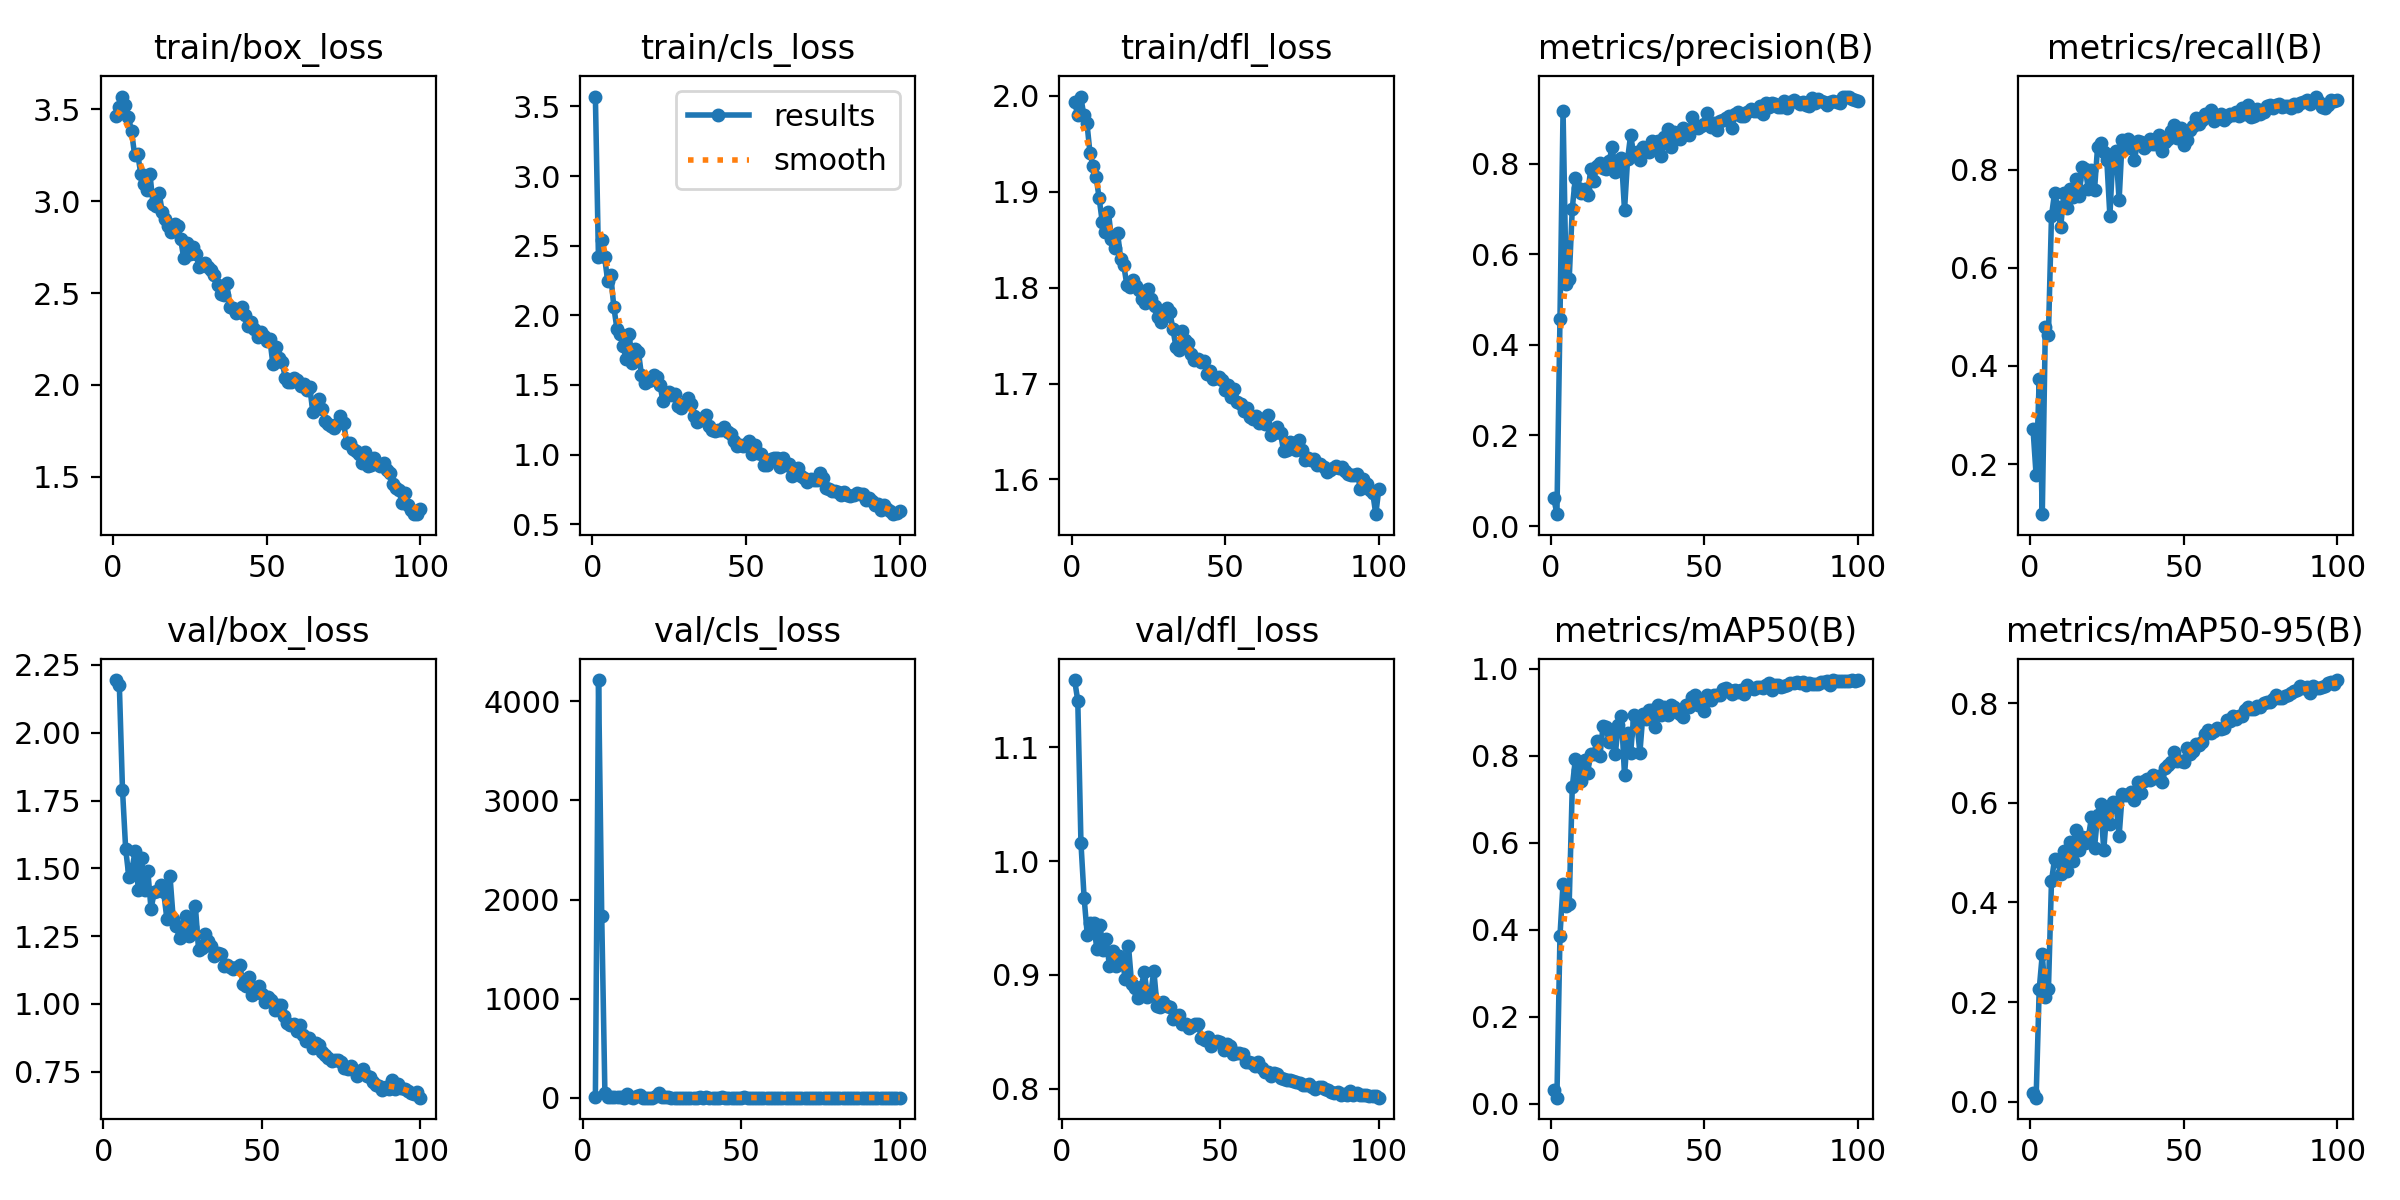

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


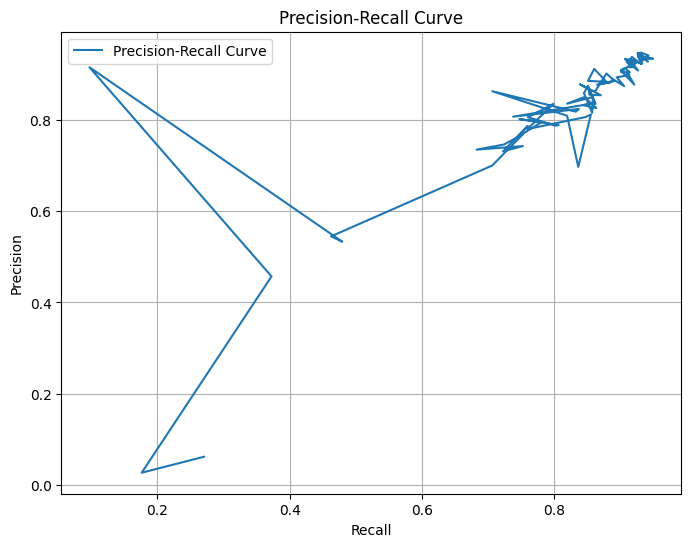

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV file
results_csv_path = '/content/runs/detect/train/results.csv'  # Update the path if necessary

# Check if the file exists before loading
try:
    results_df = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"Results CSV not found at: {results_csv_path}")
    raise

# Strip leading/trailing whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Check column names to ensure we have the correct columns
print("Available columns:", results_df.columns)

# Access precision and recall values using the cleaned column names
try:
    precision_values = results_df['metrics/precision(B)']  # Correct column name
    recall_values = results_df['metrics/recall(B)']        # Correct column name
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns are:", results_df.columns)
    raise

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

# Ensure you have the right paths
HOME = '/content'
dataset_location = f'{HOME}/working_datasets'

# Load the trained YOLO model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Load the dataset using Supervision's dataset handler
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/valid/images",
    annotations_directory_path=f"{dataset_location}/valid/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

# Set up the annotators for bounding boxes and labels
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 224x800 (no detections), 62.8ms
Speed: 1.7ms preprocess, 62.8ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 800)


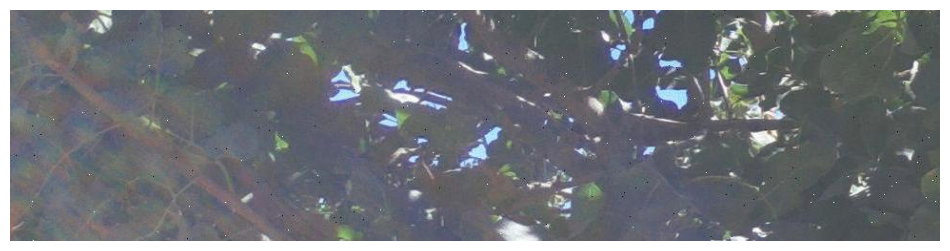

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
import pandas as pd

# Path to your results CSV
results_csv = '/content/runs/detect/train/results.csv'

# Load the results CSV
results_df = pd.read_csv(results_csv)

# Print original columns
print("Original Columns:", results_df.columns)

# Strip whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Print stripped columns
print("Stripped Columns:", results_df.columns)

# Extract metrics using the stripped column names
precision = results_df['metrics/precision(B)'].iloc[-1]
recall = results_df['metrics/recall(B)'].iloc[-1]
map_50 = results_df['metrics/mAP50(B)'].iloc[-1]
map_50_95 = results_df['metrics/mAP50-95(B)'].iloc[-1]

# Print the values
print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final mAP@50: {map_50}")
print(f"Final mAP@50-95: {map_50_95}")


Original Columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Stripped Columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Final Precision: 0.93919
Final Recall: 0.94111
Final mAP@50: 0.97416
Final mAP@50-95: 0.84608


In [ ]:
# Saving the best model to Google Drive
import shutil

# Path to your best model
best_model_path = '/content/runs/detect/train/weights/best.pt'
data_yaml_path = '/content/working_datasets/data.yaml'

# Destination path on Google Drive
drive_save_path = '/content/drive/My Drive/Pistachios/YOLOv10_best_model_negative_samples.pt'
drive_yaml_path = '/content/drive/My Drive/Pistachios/YOLOv10_data_negative_samples.yaml'


# Copying the best model to Google Drive
shutil.copy(best_model_path, drive_save_path)

print(f"Best model saved to: {drive_save_path}")

shutil.copy(data_yaml_path, drive_yaml_path)

print(f"data.yaml saved to: {drive_yaml_path}")

Best model saved to: /content/drive/My Drive/Pistachios/YOLOv10_best_model_negative_samples.pt
data.yaml saved to: /content/drive/My Drive/Pistachios/YOLOv10_data_negative_samples.yaml
